#**Import Library**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#**Data Understanding**

##Muat data

In [4]:
df = pd.read_csv("/content/Students' Academic Performance.csv")

##Deskripsi Atribut

In [5]:
# Deskripsi setiap fitur (atribut) - output dari df.head() dan df.info()
print("\nDataFrame Head (Beberapa baris pertama data):")
print(df.head())


DataFrame Head (Beberapa baris pertama data):
  gender NationalITy PlaceofBirth     StageID GradeID SectionID Topic  \
0      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
1      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
2      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
3      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
4      M          KW       KuwaIT  lowerlevel    G-04         A    IT   

  Semester Relation  raisedhands  VisITedResources  AnnouncementsView  \
0        F   Father           15                16                  2   
1        F   Father           20                20                  3   
2        F   Father           10                 7                  0   
3        F   Father           30                25                  5   
4        F   Father           40                50                 12   

   Discussion ParentAnsweringSurvey ParentschoolSatisfaction  \
0          

In [6]:
print("\nInformasi Umum DataFrame (Tipe Data & Non-Null Counts):")
df.info()


Informasi Umum DataFrame (Tipe Data & Non-Null Counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey  

In [7]:
print("\nNama-nama Kolom (Atribut) dalam Dataset:")
print(df.columns.tolist())


Nama-nama Kolom (Atribut) dalam Dataset:
['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']


In [8]:
# Ukuran dan format data
print(f"\nUkuran Data (Jumlah Baris, Jumlah Kolom): {df.shape}")
print("Format Data: CSV (diimpor ke dalam Pandas DataFrame).")


Ukuran Data (Jumlah Baris, Jumlah Kolom): (480, 17)
Format Data: CSV (diimpor ke dalam Pandas DataFrame).


In [19]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,478.000000,478.000000,478.000000,478.000000
mean,46.887029,54.974895,38.014644,43.410042
std,30.787903,33.035071,26.623507,27.620961
min,0.000000,0.000000,0.000000,1.000000
25%,16.000000,20.000000,14.250000,20.000000
50%,50.000000,65.000000,33.000000,39.500000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [9]:
# Tipe data dan target klasifikasi
# Identifikasi fitur (X) dan target (y)
X = df.drop('Class', axis=1)
y = df['Class']
print(f"\nVariabel Target (untuk Klasifikasi): '{y.name}'")
print(f"Tipe Data Variabel Target: {y.dtype}")
print(f"Kelas-kelas Unik dalam Target: {y.unique()}")


Variabel Target (untuk Klasifikasi): 'Class'
Tipe Data Variabel Target: object
Kelas-kelas Unik dalam Target: ['M' 'L' 'H']


#**Exploratory Data Analysis (EDA)**

/tmp/ipython-input-10-284173985.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='viridis', order=['L', 'M', 'H'])
/tmp/ipython-input-10-284173985.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df, palette='pastel')
/tmp/ipython-input-10-284173985.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ParentschoolSatisfaction', data=df, palette='cividis')


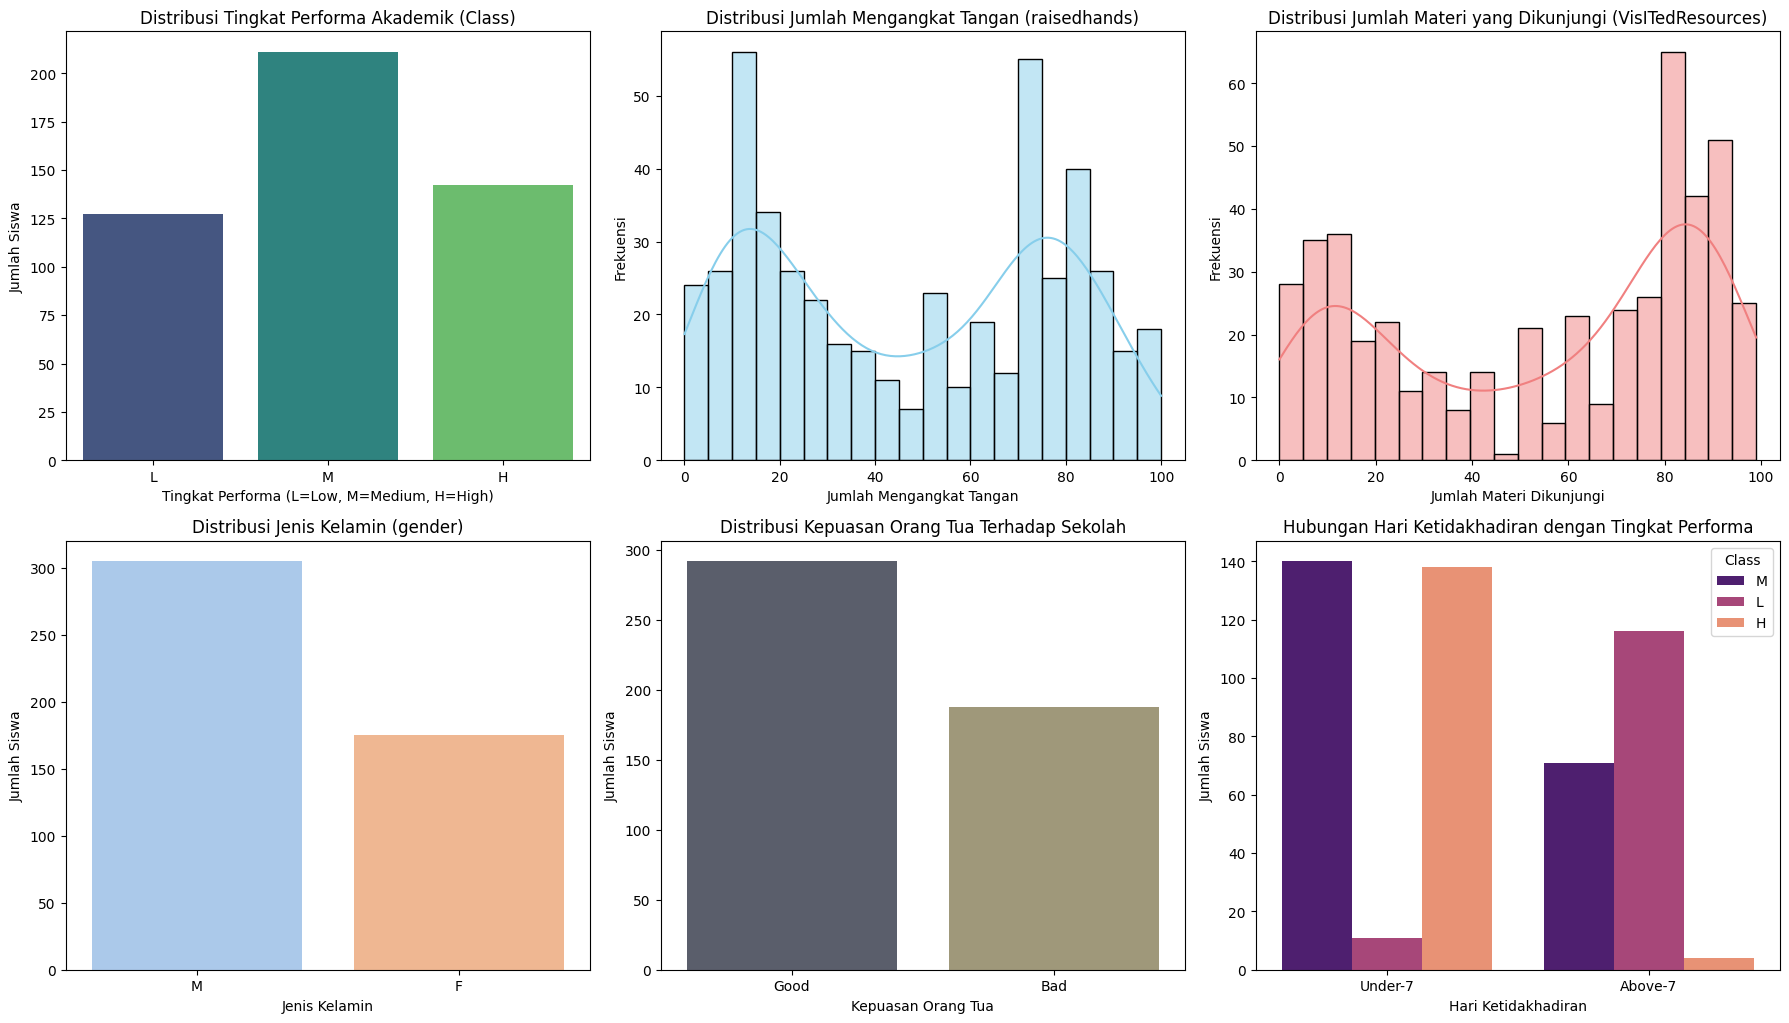

In [10]:
# Visualisasi distribusi data (histogram, bar chart)
plt.figure(figsize=(18, 15))

# Plot 1: Distribusi Kelas (Target Prediksi)
plt.subplot(3, 3, 1)
sns.countplot(x='Class', data=df, palette='viridis', order=['L', 'M', 'H'])
plt.title('Distribusi Tingkat Performa Akademik (Class)')
plt.xlabel('Tingkat Performa (L=Low, M=Medium, H=High)')
plt.ylabel('Jumlah Siswa')

# Plot 2: Distribusi Fitur Numerik - raisedhands
plt.subplot(3, 3, 2)
sns.histplot(df['raisedhands'], bins=20, kde=True, color='skyblue')
plt.title('Distribusi Jumlah Mengangkat Tangan (raisedhands)')
plt.xlabel('Jumlah Mengangkat Tangan')
plt.ylabel('Frekuensi')

# Plot 3: Distribusi Fitur Numerik - VisITedResources
plt.subplot(3, 3, 3)
sns.histplot(df['VisITedResources'], bins=20, kde=True, color='lightcoral')
plt.title('Distribusi Jumlah Materi yang Dikunjungi (VisITedResources)')
plt.xlabel('Jumlah Materi Dikunjungi')
plt.ylabel('Frekuensi')

# Plot 4: Distribusi Fitur Kategorikal - gender
plt.subplot(3, 3, 4)
sns.countplot(x='gender', data=df, palette='pastel')
plt.title('Distribusi Jenis Kelamin (gender)')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Siswa')

# Plot 5: Distribusi Fitur Kategorikal - ParentschoolSatisfaction
plt.subplot(3, 3, 5)
sns.countplot(x='ParentschoolSatisfaction', data=df, palette='cividis')
plt.title('Distribusi Kepuasan Orang Tua Terhadap Sekolah')
plt.xlabel('Kepuasan Orang Tua')
plt.ylabel('Jumlah Siswa')

# Plot 6: Hubungan antara StudentAbsenceDays dan Class
plt.subplot(3, 3, 6)
sns.countplot(x='StudentAbsenceDays', hue='Class', data=df, palette='magma')
plt.title('Hubungan Hari Ketidakhadiran dengan Tingkat Performa')
plt.xlabel('Hari Ketidakhadiran')
plt.ylabel('Jumlah Siswa')
plt.legend(title='Class')

plt.tight_layout()
plt.show()


Analisis Korelasi Antar Fitur Numerik:


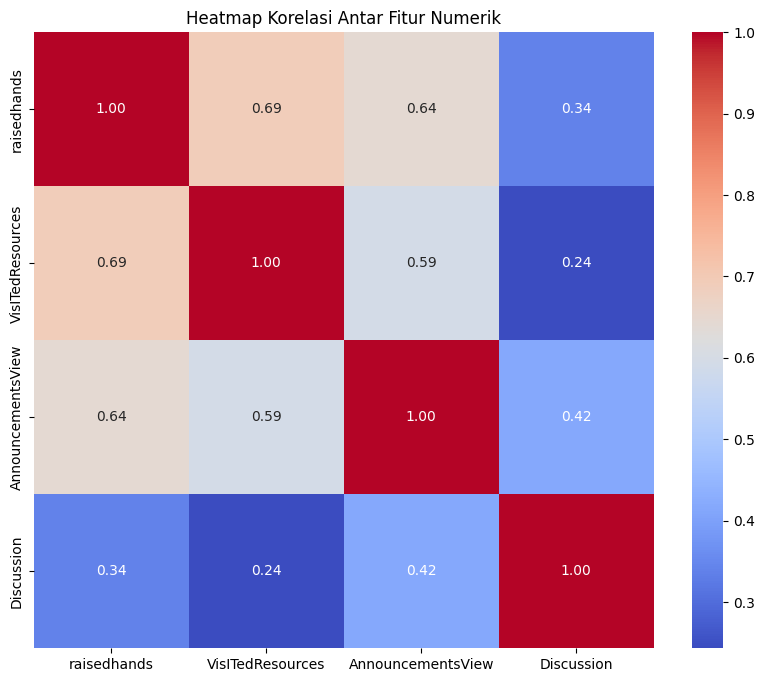

In [11]:
# Analisis korelasi antar fitur (heatmap untuk numerik)
print("\nAnalisis Korelasi Antar Fitur Numerik:")
numeric_cols_for_corr = df.select_dtypes(include=np.number).columns.tolist()
# Pastikan kolom target (jika numerik) atau kolom yang sudah di-drop tidak ikut di sini
# Karena X sudah drop 'Class', kita gunakan kolom X yang numerik
numeric_cols_in_X = X.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(10, 8))
sns.heatmap(X[numeric_cols_in_X].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antar Fitur Numerik')
plt.show()

In [12]:
# Deteksi data tidak seimbang (imbalanced classes)
print("\nDeteksi Data Tidak Seimbang (Imbalanced Classes):")
class_distribution = df['Class'].value_counts(normalize=True) * 100
print("Distribusi Persentase Kelas Target:")
print(class_distribution)
if any(class_distribution < 20): # Contoh threshold untuk imbalance
    print("Indikasi adanya ketidakseimbangan kelas (beberapa kelas memiliki persentase < 20%).")
else:
    print("Kelas-kelas target tampaknya cukup seimbang.")


Deteksi Data Tidak Seimbang (Imbalanced Classes):
Distribusi Persentase Kelas Target:
Class
M    43.958333
H    29.583333
L    26.458333
Name: proportion, dtype: float64
Kelas-kelas target tampaknya cukup seimbang.


#**Data Preparation**

In [13]:
# --- 5. Data Preparation ---
print("--- 5. Data Preparation ---")

# Pembersihan data (null value, duplikasi)
print(f"\nJumlah Missing Values sebelum penanganan: {df.isnull().sum().sum()}")
if df.isnull().sum().sum() > 0:
    print("Menangani missing values (jika ada) dengan mengisi menggunakan modus/median.")
    for col in df.columns:
        if df[col].isnull().any():
            if df[col].dtype == 'object': # Untuk kolom kategorikal
                df[col].fillna(df[col].mode()[0], inplace=True)
            else: # Untuk kolom numerik
                df[col].fillna(df[col].median(), inplace=True)
    print(f"Jumlah Missing Values setelah penanganan: {df.isnull().sum().sum()}")
else:
    print("Tidak ada missing values terdeteksi pada DataFrame asli. Melewati penanganan missing value secara eksplisit.")

print(f"\nJumlah baris duplikat sebelum penanganan: {df.duplicated().sum()}")
if df.duplicated().sum() > 0:
    df.drop_duplicates(inplace=True)
    print(f"Duplikasi dihapus. Jumlah baris setelah duplikasi dihapus: {df.shape[0]}")
else:
    print("Tidak ada baris duplikat terdeteksi.")

# --- Re-identifikasi X dan y setelah pembersihan ---
X = df.drop('Class', axis=1)
y = df['Class']

# Identifikasi ulang kolom kategorikal dan numerik
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"\nFitur Kategorikal yang akan di-encode: {categorical_features}")
print(f"Fitur Numerik yang akan distandardisasi: {numerical_features}")

# Encoding data target (y)
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print(f"\nTarget 'Class' di-encode menjadi numerik. Mapping: {le.classes_} -> {le.transform(le.classes_)}")

# Menggunakan ColumnTransformer untuk preprocessing fitur (X)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='drop'
)

# Split data (train-test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# --- Lakukan preprocessing pada data training dan testing ---
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# --- Tambahan: Pemeriksaan dan Penanganan NaN setelah Preprocessing ---
# Ini adalah langkah kritis untuk mengatasi error "Input X contains NaN"
# StandardScaler dapat menghasilkan NaN jika ada nilai inf atau -inf
# OneHotEncoder seharusnya tidak menghasilkan NaN, tapi jika ada masalah input awal mungkin.

# Konversi sparse matrix ke dense array jika OneHotEncoder menghasilkan sparse matrix
if hasattr(X_train_processed, 'toarray'):
    X_train_processed = X_train_processed.toarray()
if hasattr(X_test_processed, 'toarray'):
    X_test_processed = X_test_processed.toarray()

# Cek kembali NaN setelah preprocessing
nan_in_train_processed = np.isnan(X_train_processed).sum()
nan_in_test_processed = np.isnan(X_test_processed).sum()

print(f"\nJumlah NaN di X_train_processed setelah preprocessing: {nan_in_train_processed}")
print(f"Jumlah NaN di X_test_processed setelah preprocessing: {nan_in_test_processed}")

if nan_in_train_processed > 0 or nan_in_test_processed > 0:
    print("Ada NaN setelah preprocessing. Mengisi NaN dengan 0 atau rata-rata kolom.")
    # Mengisi NaN dengan 0 (strategi sederhana) atau bisa juga dengan np.nanmean
    X_train_processed = np.nan_to_num(X_train_processed, nan=0.0)
    X_test_processed = np.nan_to_num(X_test_processed, nan=0.0)
    print("NaN setelah preprocessing telah diisi dengan 0.")

# Verifikasi final:
print(f"\nUkuran X_train setelah preprocessing: {X_train_processed.shape}")
print(f"Ukuran X_test setelah preprocessing: {X_test_processed.shape}")
print(f"Ukuran y_train: {y_train.shape}")
print(f"Ukuran y_test: {y_test.shape}")
print("Data berhasil di-split dan diproses, siap untuk modeling.")


--- 5. Data Preparation ---

Jumlah Missing Values sebelum penanganan: 0
Tidak ada missing values terdeteksi pada DataFrame asli. Melewati penanganan missing value secara eksplisit.

Jumlah baris duplikat sebelum penanganan: 2
Duplikasi dihapus. Jumlah baris setelah duplikasi dihapus: 478

Fitur Kategorikal yang akan di-encode: ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays']
Fitur Numerik yang akan distandardisasi: ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']

Target 'Class' di-encode menjadi numerik. Mapping: ['H' 'L' 'M'] -> [0 1 2]

Jumlah NaN di X_train_processed setelah preprocessing: 0
Jumlah NaN di X_test_processed setelah preprocessing: 0

Ukuran X_train setelah preprocessing: (382, 72)
Ukuran X_test setelah preprocessing: (96, 72)
Ukuran y_train: (382,)
Ukuran y_test: (96,)
Data berhasil di-split dan diproses, siap u

#**Modeling**

In [14]:
# --- 6. Modeling ---
print("--- 6. Modeling ---")

# Pemilihan algoritma: Naive Bayes (GaussianNB)
model = GaussianNB()
print("\nAlgoritma yang dipilih: Gaussian Naive Bayes.")
print("Alasan pemilihan model: Algoritma ini dikenal sederhana, efisien dalam komputasi, dan seringkali memberikan kinerja yang baik pada tugas klasifikasi, terutama dengan dataset yang besar dan fitur yang (diasumsikan) independen. Implementasinya juga mudah dengan Scikit-learn.")

# Melatih model menggunakan data training yang sudah diproses
# Pastikan X_train_processed tidak ada NaN lagi
print("Melatih model...")
model.fit(X_train_processed, y_train)
print("Model selesai dilatih.")

# Visualisasi model (tambahan)
print("\nParameter Model yang Dipelajari (untuk Gaussian Naive Bayes):")
print(f"Kelas-kelas yang dipelajari oleh model: {le.inverse_transform(model.classes_)}")
print(f"Probabilitas prior untuk setiap kelas: {model.class_prior_}")
print("Parameter theta_ (mean) dan sigma_ (variance) untuk setiap fitur per kelas dapat diekstraksi dari model yang telah dilatih.")

--- 6. Modeling ---

Algoritma yang dipilih: Gaussian Naive Bayes.
Alasan pemilihan model: Algoritma ini dikenal sederhana, efisien dalam komputasi, dan seringkali memberikan kinerja yang baik pada tugas klasifikasi, terutama dengan dataset yang besar dan fitur yang (diasumsikan) independen. Implementasinya juga mudah dengan Scikit-learn.
Melatih model...
Model selesai dilatih.

Parameter Model yang Dipelajari (untuk Gaussian Naive Bayes):
Kelas-kelas yang dipelajari oleh model: ['H' 'L' 'M']
Probabilitas prior untuk setiap kelas: [0.29581152 0.2617801  0.44240838]
Parameter theta_ (mean) dan sigma_ (variance) untuk setiap fitur per kelas dapat diekstraksi dari model yang telah dilatih.


#**Evaluation**


Confusion Matrix:
          Predicted H  Predicted L  Predicted M
Actual H           24            4            1
Actual L            0           25            0
Actual M           19           17            6

Accuracy: 0.5729
Precision (weighted): 0.6851
Recall (weighted): 0.5729
F1-score (weighted): 0.4919

Ringkasan Kinerja Model:
- Accuracy (0.5729): 57.29% prediksi benar.
- Precision (weighted): 68.51%, rata-rata presisi antar kelas.
- Recall (weighted): 57.29%, rata-rata recall antar kelas.
- F1-score (weighted): 49.19%, keseimbangan presisi & recall.

Interpretasi Confusion Matrix:
Baris = kelas aktual, kolom = kelas prediksi.
Nilai diagonal = prediksi benar. Lainnya = kesalahan klasifikasi.


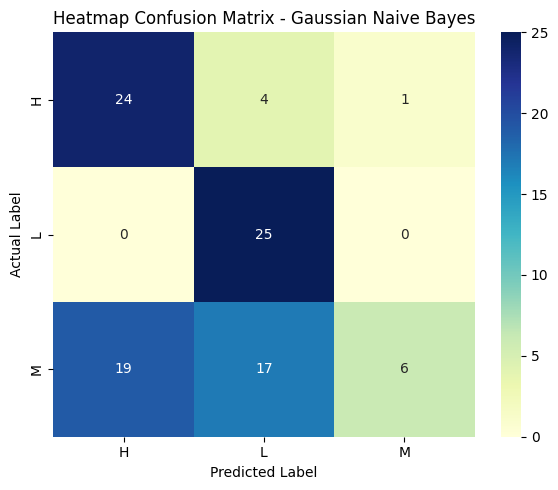

In [18]:
# --- 7. Evaluation ---

# Prediksi pada data uji yang sudah diproses
# Pastikan X_test_processed sudah didefinisikan dari bagian 5 dan 'model' sudah dilatih dari bagian 6
y_pred = model.predict(X_test_processed)

# Mengembalikan label numerik ke label aslinya untuk pemahaman confusion matrix yang lebih baik
y_test_labels = le.inverse_transform(y_test)
y_pred_labels = le.inverse_transform(y_pred)

# Confusion Matrix
# Pastikan urutan label sesuai dengan le.classes_ untuk tampilan yang konsisten
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=le.classes_)
print("\nConfusion Matrix:")
print(pd.DataFrame(cm, index=[f'Actual {c}' for c in le.classes_], columns=[f'Predicted {c}' for c in le.classes_]))

# Metrik evaluasi: Accuracy, Precision, Recall, F1-score
accuracy = accuracy_score(y_test, y_pred)
# 'weighted' digunakan karena ini klasifikasi multi-kelas dan mungkin ada imbalance
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1-score (weighted): {f1:.4f}")

# === 4. Ringkasan Kinerja Model ===
print("\nRingkasan Kinerja Model:")
print(f"- Accuracy ({accuracy:.4f}): {accuracy*100:.2f}% prediksi benar.")
print(f"- Precision (weighted): {precision*100:.2f}%, rata-rata presisi antar kelas.")
print(f"- Recall (weighted): {recall*100:.2f}%, rata-rata recall antar kelas.")
print(f"- F1-score (weighted): {f1*100:.2f}%, keseimbangan presisi & recall.")

# === 5. Ringkasan Confusion Matrix ===
print("\nInterpretasi Confusion Matrix:")
print("Baris = kelas aktual, kolom = kelas prediksi.")
print("Nilai diagonal = prediksi benar. Lainnya = kesalahan klasifikasi.")

# === 6. Visualisasi Heatmap Confusion Matrix ===
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Heatmap Confusion Matrix - Gaussian Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.tight_layout()
plt.show()
